In [1]:
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

import seaborn as sns

import scipy
import pylab

Matplotlib is building the font cache; this may take a moment.


In [7]:
df = pd.read_csv("data/merged-control-data.csv")

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'data/merged-control-data.csv'

In [5]:
df.head()

<class 'NameError'>: name 'df' is not defined

In [5]:
df_simple = df.copy()
df_simple['diagnosis'] = df_simple['diagnosis'].str.lower().replace({'cd': 'IBD', 'uc': 'IBD', 'nonibd': 'Control'})
df_simple['norm_depth'] = df_simple['average_depth']/df_simple['read_count'] * 1000000


df_filter = df[df['contig'].notna()]
df_simple_filter = df_simple[df_simple['contig'].notna()]

In [6]:
print('There are a minimum of 9 rows per sample')
df_simple.sort_values(['run', "gene"]).head(n=20)

There are a minimum of 9 rows per sample


,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,norm_depth
1938,NaN,ERR011087,AAA60327.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8111,NaN,ERR011087,AAL19700.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4087,NaN,ERR011087,AAL19701.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9623,NaN,ERR011087,NP_417533.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11623,NaN,ERR011087,NP_417534.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5833,NaN,ERR011087,NP_459741.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9746,NaN,ERR011087,NP_459742.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,NaN,ERR011087,NP_462264.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10908,NaN,ERR011087,NP_462265.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10188,NaN,ERR011088,AAA60327.1,Control,10868175,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("But a sample may contain any number of contigs for a gene.\nI.e. a sample has a minimum of 9 rows but no maximum.")
df_simple.sort_values(['run', "gene"]).tail(n=20)

But a sample may contain any number of contigs for a gene.
I.e. a sample has a minimum of 9 rows but no maximum.


,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,norm_depth
776,NaN,SRR6468717,NP_417534.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
6629,k119_18375_2,SRR6468717,NP_459741.1,IBD,5986216,552.0,36.0,4.0,32.0,552.0,6.03,1.007314
2720,k119_23443_6,SRR6468717,NP_459742.1,IBD,5986216,843.0,177.0,41.0,136.0,843.0,18.69,3.122173
10637,NaN,SRR6468717,NP_462264.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
21,NaN,SRR6468717,NP_462265.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
10056,k119_8049_5,SRR6468718,AAA60327.1,IBD,10773619,1032.0,94.0,8.0,86.0,1032.0,8.51,0.789892
10057,k119_42053_20,SRR6468718,AAA60327.1,IBD,10773619,1041.0,253.0,27.0,226.0,1041.0,21.74,2.017892
10058,k119_14515_86,SRR6468718,AAA60327.1,IBD,10773619,1041.0,366.0,56.0,310.0,1041.0,30.53,2.833774
10059,k119_59930_2,SRR6468718,AAA60327.1,IBD,10773619,1050.0,115.0,11.0,104.0,1050.0,9.84,0.913342
10060,k119_10184_9,SRR6468718,AAA60327.1,IBD,10773619,1032.0,304.0,32.0,272.0,1032.0,26.69,2.477348


In [8]:
print("The average read count per diagnosis")
df_simple.groupby('diagnosis')['read_count'].mean()

The average read count per diagnosis


diagnosis
Control    1.457458e+07
IBD        1.201639e+07
Name: read_count, dtype: float64

In [9]:
print('Number of samples for each diagnosis')
df_simple.groupby(['diagnosis'])['run'].nunique()

Number of samples for each diagnosis


diagnosis
Control    372
IBD        687
Name: run, dtype: int64

In [10]:
df_simple.groupby(['diagnosis'])['gene'].nunique()

diagnosis
Control    9
IBD        9
Name: gene, dtype: int64

In [11]:
df_simple.groupby(['diagnosis', 'gene'])['run'].nunique()

diagnosis  gene       
Control    AAA60327.1     372
           AAL19700.1     372
           AAL19701.1     372
           NP_417533.1    372
           NP_417534.1    372
           NP_459741.1    372
           NP_459742.1    372
           NP_462264.1    372
           NP_462265.1    372
IBD        AAA60327.1     687
           AAL19700.1     687
           AAL19701.1     687
           NP_417533.1    687
           NP_417534.1    687
           NP_459741.1    687
           NP_459742.1    687
           NP_462264.1    687
           NP_462265.1    687
Name: run, dtype: int64

In [12]:
df_simple.groupby(['diagnosis', 'gene'])['run'].value_counts()

diagnosis  gene         run       
Control    AAA60327.1   SRR6468523    4
                        SRR6468679    4
                        SRR1215858    3
                        SRR2145373    3
                        SRR5650176    3
                                     ..
IBD        NP_462265.1  SRR6468713    1
                        SRR6468714    1
                        SRR6468716    1
                        SRR6468717    1
                        SRR6468718    1
Name: count, Length: 9531, dtype: int64

In [13]:
# Step 1–2: Get number of unique runs per (diagnosis, gene) group
run_counts = df_simple.groupby(['diagnosis', 'gene'])['run'].value_counts().sort_index()

# Step 3: Get value counts (i.e., how often each unique run count appears)
run_count_frequencies = unique_run_counts.value_counts().sort_index()

# Step 4: Plot
#

<class 'NameError'>: name 'unique_run_counts' is not defined

In [14]:
print('Number of contigs for each diagnosis')
df_simple.groupby(['diagnosis', 'gene'])['gene'].value_counts()

Number of contigs for each diagnosis


diagnosis  gene       
Control    AAA60327.1     416
           AAL19700.1     475
           AAL19701.1     466
           NP_417533.1    443
           NP_417534.1    407
           NP_459741.1    475
           NP_459742.1    466
           NP_462264.1    443
           NP_462265.1    458
IBD        AAA60327.1     859
           AAL19700.1     891
           AAL19701.1     835
           NP_417533.1    776
           NP_417534.1    748
           NP_459741.1    891
           NP_459742.1    876
           NP_462264.1    873
           NP_462265.1    878
Name: count, dtype: int64

In [15]:
df_simple['is_dup'] = df_simple.groupby('diagnosis')['run'].transform(lambda x: x.duplicated(keep=False))

print('Number of samples that are duplicated')
df_simple[df_simple['is_dup']].groupby('diagnosis').size()

Number of samples that are duplicated


diagnosis
Control    4049
IBD        7627
dtype: int64

In [16]:
gene_diagnosis = pd.crosstab(df['gene'], df['diagnosis'])
gene_diagnosis
#pd.crosstab(df_simple['gene'], df_simple['diagnosis'])

diagnosis,CD,UC,nonIBD
gene,,,
AAA60327.1,674,185,416
AAL19700.1,711,180,475
AAL19701.1,653,182,466
NP_417533.1,625,151,443
NP_417534.1,609,139,407
NP_459741.1,711,180,475
NP_459742.1,694,182,466
NP_462264.1,698,175,443
NP_462265.1,711,167,458


In [17]:
gene_diagnosis_filter = pd.crosstab(df_filter['gene'], df_filter['diagnosis'])
gene_diagnosis_filter

diagnosis,CD,UC,nonIBD
gene,,,
AAA60327.1,247,123,130
AAL19700.1,287,117,169
AAL19701.1,222,121,156
NP_417533.1,204,88,207
NP_417534.1,301,66,132
NP_459741.1,287,117,169
NP_459742.1,265,121,156
NP_462264.1,284,113,153
NP_462265.1,303,103,167


In [18]:
gene_diagnosis_simple = pd.crosstab(df_simple['gene'], df_simple['diagnosis'])
gene_diagnosis_simple

diagnosis,Control,IBD
gene,,
AAA60327.1,416,859
AAL19700.1,475,891
AAL19701.1,466,835
NP_417533.1,443,776
NP_417534.1,407,748
NP_459741.1,475,891
NP_459742.1,466,876
NP_462264.1,443,873
NP_462265.1,458,878


In [19]:
gene_diagnosis_simple_filter = pd.crosstab(df_simple_filter['gene'], df_simple_filter['diagnosis'])
gene_diagnosis_simple_filter

diagnosis,Control,IBD
gene,,
AAA60327.1,130,370
AAL19700.1,169,404
AAL19701.1,156,343
NP_417533.1,207,292
NP_417534.1,132,367
NP_459741.1,169,404
NP_459742.1,156,386
NP_462264.1,153,397
NP_462265.1,167,406


In [20]:
gene_contig = pd.crosstab(
    df['gene'],
    df['contig'].isna().map({True: 'None', False: 'Contigs Found'})
)
gene_contig

contig,Contigs Found,None
gene,,
AAA60327.1,500,775
AAL19700.1,573,793
AAL19701.1,499,802
NP_417533.1,499,720
NP_417534.1,499,656
NP_459741.1,573,793
NP_459742.1,542,800
NP_462264.1,550,766
NP_462265.1,573,763


In [21]:
diagnosis_contig = pd.crosstab(
    df['diagnosis'],
    df['contig'].isna().map({True: 'None', False: 'Contigs Found'})
)
diagnosis_contig

contig,Contigs Found,None
diagnosis,,
CD,2400,3686
UC,969,572
nonIBD,1439,2610


In [22]:
diagnosis_contig_simple = pd.crosstab(
    df_simple['diagnosis'],
    df_simple['contig'].isna().map({True: 'None', False: 'Contigs Found'})
)
diagnosis_contig_simple

contig,Contigs Found,None
diagnosis,,
Control,1439,2610
IBD,3369,4258


In [23]:
df['diagnosis'].unique()
df['diagnosis'].nunique()
df['diagnosis'].value_counts()

diagnosis
CD        6086
nonIBD    4049
UC        1541
Name: count, dtype: int64

In [24]:
df['run'].nunique()

1059

In [25]:
df_simple.groupby('diagnosis')['run'].value_counts()

diagnosis  run       
Control    SRR6468689    36
           SRR6468543    35
           SRR6468523    32
           SRR6468616    32
           SRR6468614    31
                         ..
IBD        SRR6468692     9
           SRR6468694     9
           SRR6468704     9
           SRR6468708     9
           SRR6468717     9
Name: count, Length: 1059, dtype: int64

In [26]:
df_simple.groupby('diagnosis')['run'].value_counts().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))

diagnosis  run       
Control    SRR6468689    36
           SRR6468543    35
           SRR6468523    32
           SRR6468616    32
           SRR6468614    31
                         ..
IBD        SRR1215626     9
           SRR1215620     9
           SRR1215615     9
           SRR1215614     9
           SRR6468717     9
Name: count, Length: 1059, dtype: int64

In [27]:
df_simple.groupby('diagnosis')['run'].value_counts().groupby(level=0).sum()

diagnosis
Control    4049
IBD        7627
Name: count, dtype: int64

In [28]:
df_simple.groupby('diagnosis')['run'].value_counts().groupby(level=0).count()

diagnosis
Control    372
IBD        687
Name: count, dtype: int64

In [29]:
run_diagnosis_count = df_simple.groupby('diagnosis')['run'].value_counts()

filtered = df_simple_filter.groupby('diagnosis')['run'].value_counts() #run_diagnosis_count[run_diagnosis_count > 9]
filtered

diagnosis  run       
Control    SRR6468689    36
           SRR6468543    35
           SRR6468523    32
           SRR6468616    32
           SRR6468614    31
                         ..
IBD        SRR2145645     1
           SRR2145653     1
           SRR5650121     1
           SRR6468570     1
           SRR6468589     1
Name: count, Length: 639, dtype: int64

In [30]:
ibd_counts = run_diagnosis_count.loc['IBD']
control_counts = run_diagnosis_count.loc['Control']

ibd_counts_filter = filtered.loc['IBD']
control_counts_filter = filtered.loc['Control']

In [31]:
ibd_counts.head()

run
SRR1211172    105
SRR1211404     70
SRR1211428     67
SRR1211418     65
SRR1211157     44
Name: count, dtype: int64

In [32]:
ibd_counts.tail()

run
SRR6468692    9
SRR6468694    9
SRR6468704    9
SRR6468708    9
SRR6468717    9
Name: count, dtype: int64

In [33]:
ibd_counts_filter.head()

run
SRR1211172    102
SRR1211404     68
SRR1211428     64
SRR1211418     63
SRR1211157     42
Name: count, dtype: int64

In [34]:
ibd_counts_filter.tail()

run
SRR2145645    1
SRR2145653    1
SRR5650121    1
SRR6468570    1
SRR6468589    1
Name: count, dtype: int64

In [35]:
control_counts.head()

run
SRR6468689    36
SRR6468543    35
SRR6468523    32
SRR6468616    32
SRR6468614    31
Name: count, dtype: int64

In [36]:
control_counts_filter.head()

run
SRR6468689    36
SRR6468543    35
SRR6468523    32
SRR6468616    32
SRR6468614    31
Name: count, dtype: int64

In [37]:
filtered.groupby(level=0).sum()

diagnosis
Control    1439
IBD        3369
Name: count, dtype: int64

In [38]:
filtered.groupby(level=0).count()

diagnosis
Control    166
IBD        473
Name: count, dtype: int64

In [39]:
#run_diagnosis_count = df_simple.groupby('diagnosis')['run'].value_counts()
#filtered = run_diagnosis_count[run_diagnosis_count == 9]
#print(filtered)

In [40]:
print("The count of rows in DataFrame with no sequence depth:")
print(" - ", (df[['average_depth']].sum(axis=1) == 0).sum())

The count of rows in DataFrame with no sequence depth:
 -  6868


In [41]:
print("The amount of gene alignments without any contigs found in sample") 
print(df[['contig']].isna().sum())

The amount of gene alignments without any contigs found in sample
contig    6868
dtype: int64


In [42]:
print("The count of rows in DataFrame with any sequence depth:")
print(" - ", (df[['average_depth']].sum(axis=1) > 0).sum())

The count of rows in DataFrame with any sequence depth:
 -  4808


In [43]:
mean_val = df_simple_filter['average_depth'].mean()
std_val = df_simple_filter['average_depth'].std()

lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

df_simple_filter_outlierless = df_simple_filter[(df_simple_filter['average_depth'] >= lower_bound) & (df_simple_filter['average_depth'] <= upper_bound)]

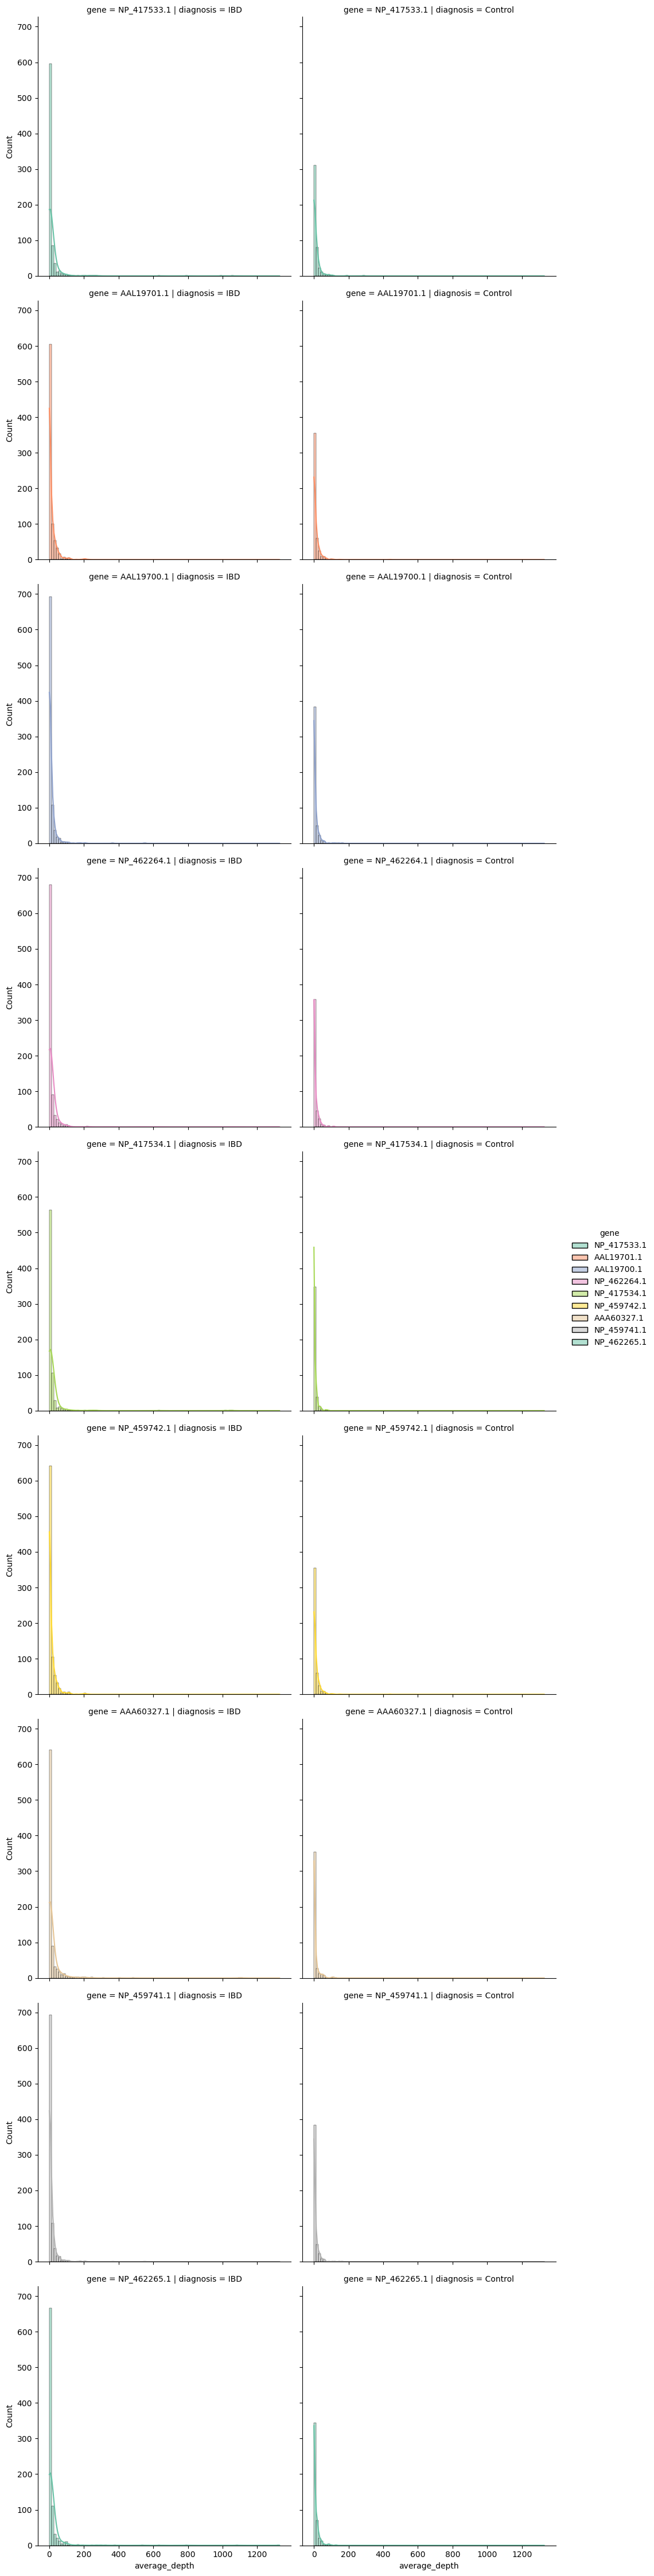

In [44]:
sns.displot(
    data=df_simple, #df_simple_filter, df_simple_filter_outlierless
    x="average_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True
)

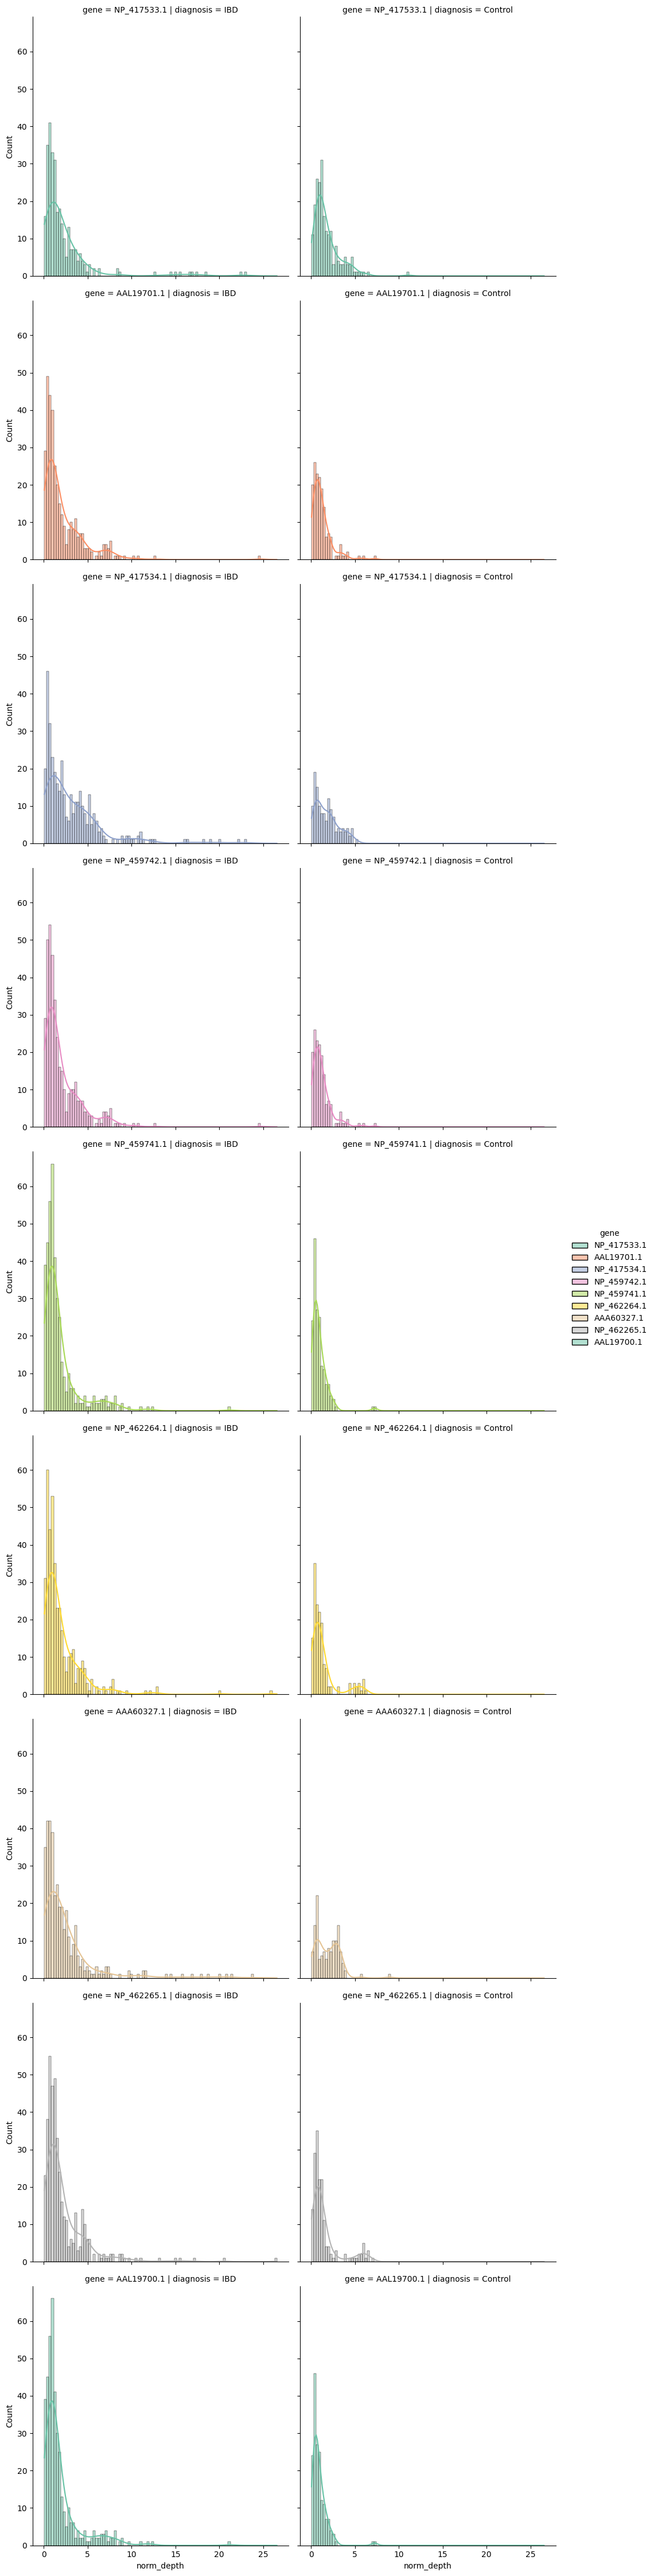

In [45]:
sns.displot(
    data=df_simple_filter, #df_simple_filter, df_simple_filter_outlierless
    x="norm_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True
)

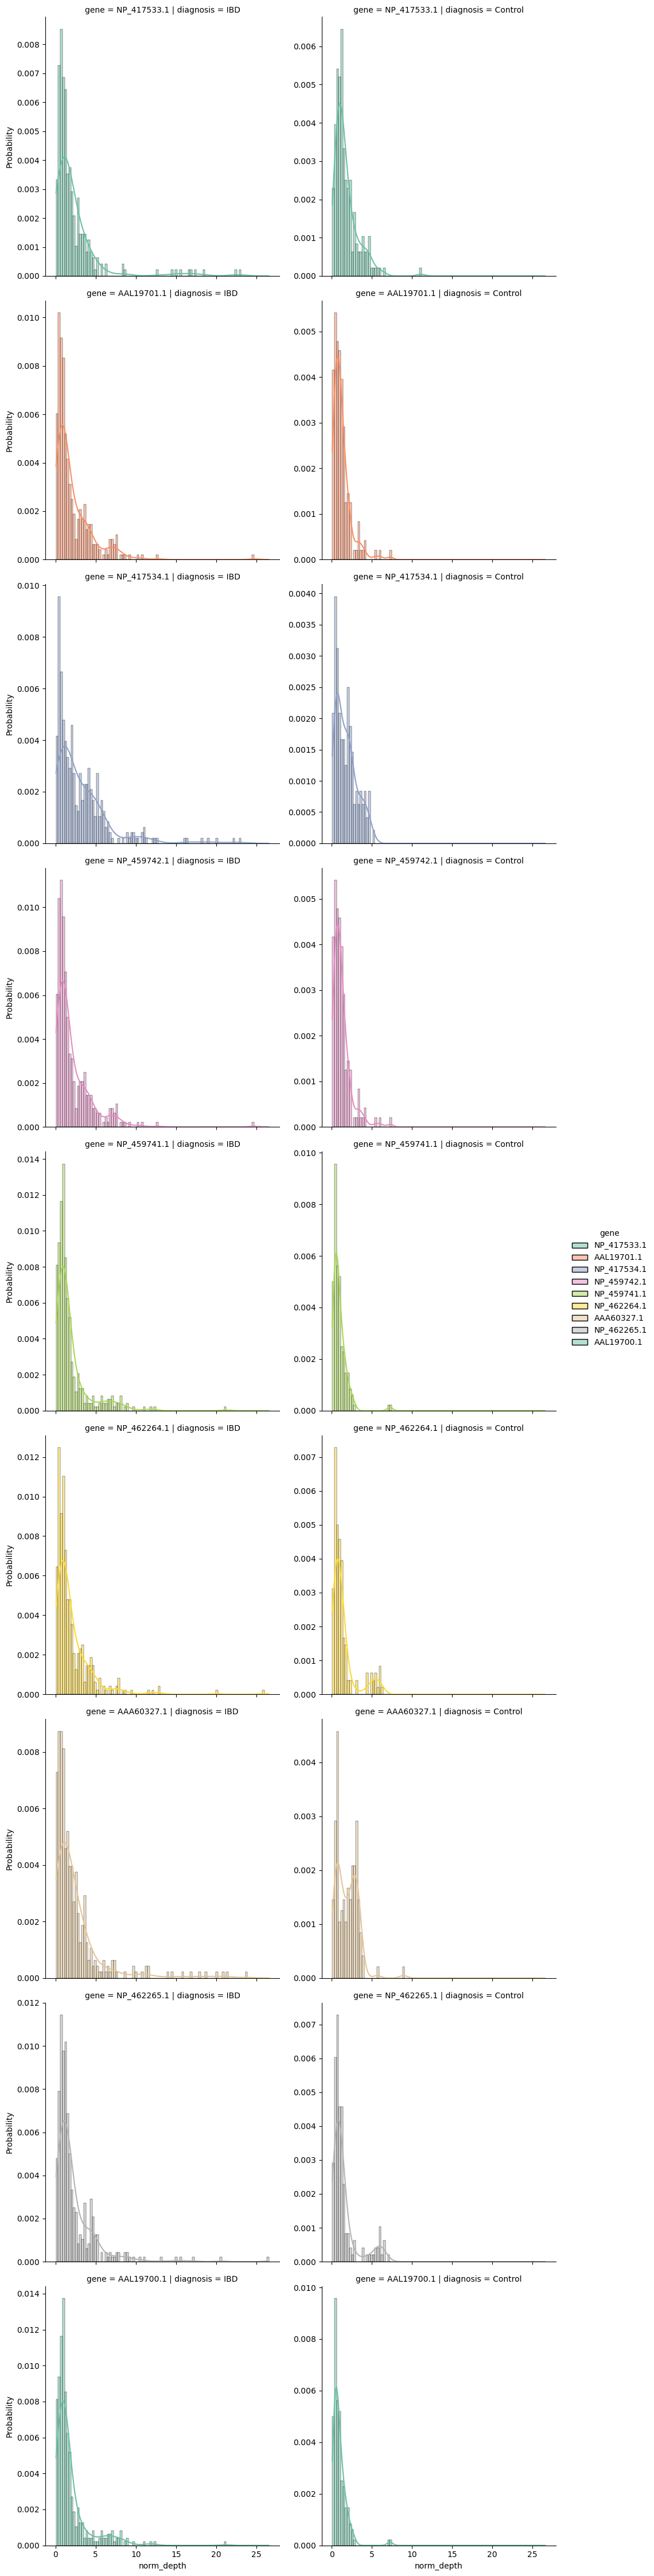

In [46]:
g = sns.displot(
    data=df_simple_filter,
    x="norm_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    row='gene',
    col='diagnosis',
    kde=True,
    facet_kws={'sharey': False, 'sharex': True},
    stat="probability"  # "density", "probability"
)

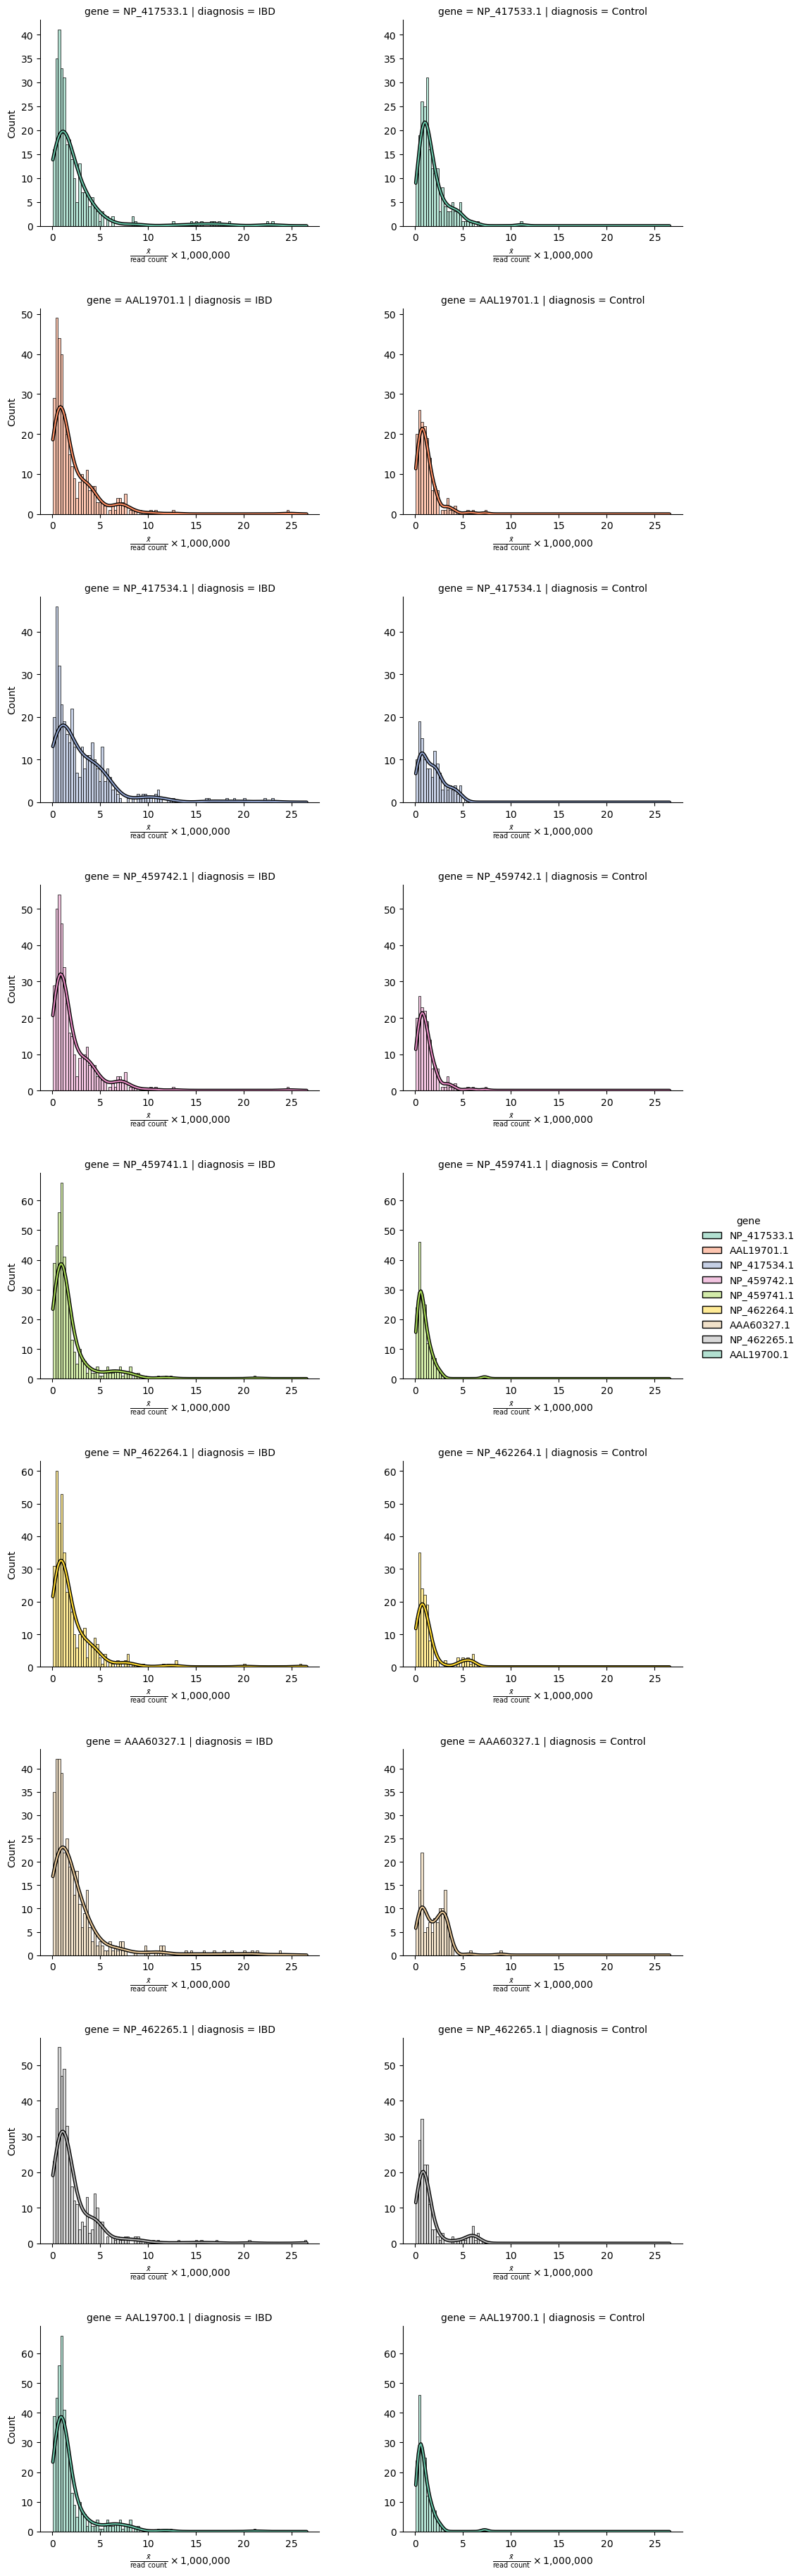

In [47]:
# For the genes found in any sample, there is a greater amount of the same coverage of target genes
# in IBD samples compared to control even after removing the 'extremely' deep coverage only seen in the IBD samples.
g = sns.displot(
    data=df_simple_filter,
    x="norm_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    row='gene',
    col='diagnosis',
    kde=True,
    facet_kws={'sharey': False, 'sharex': False}
)


# Get FacetGrid row names
row_names = g.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = g.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
for ax in g.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

g.fig.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.20)  # add space for x axis

plt.savefig('norm_coverage_distribution.png', dpi=262.5, bbox_inches='tight')
plt.show()


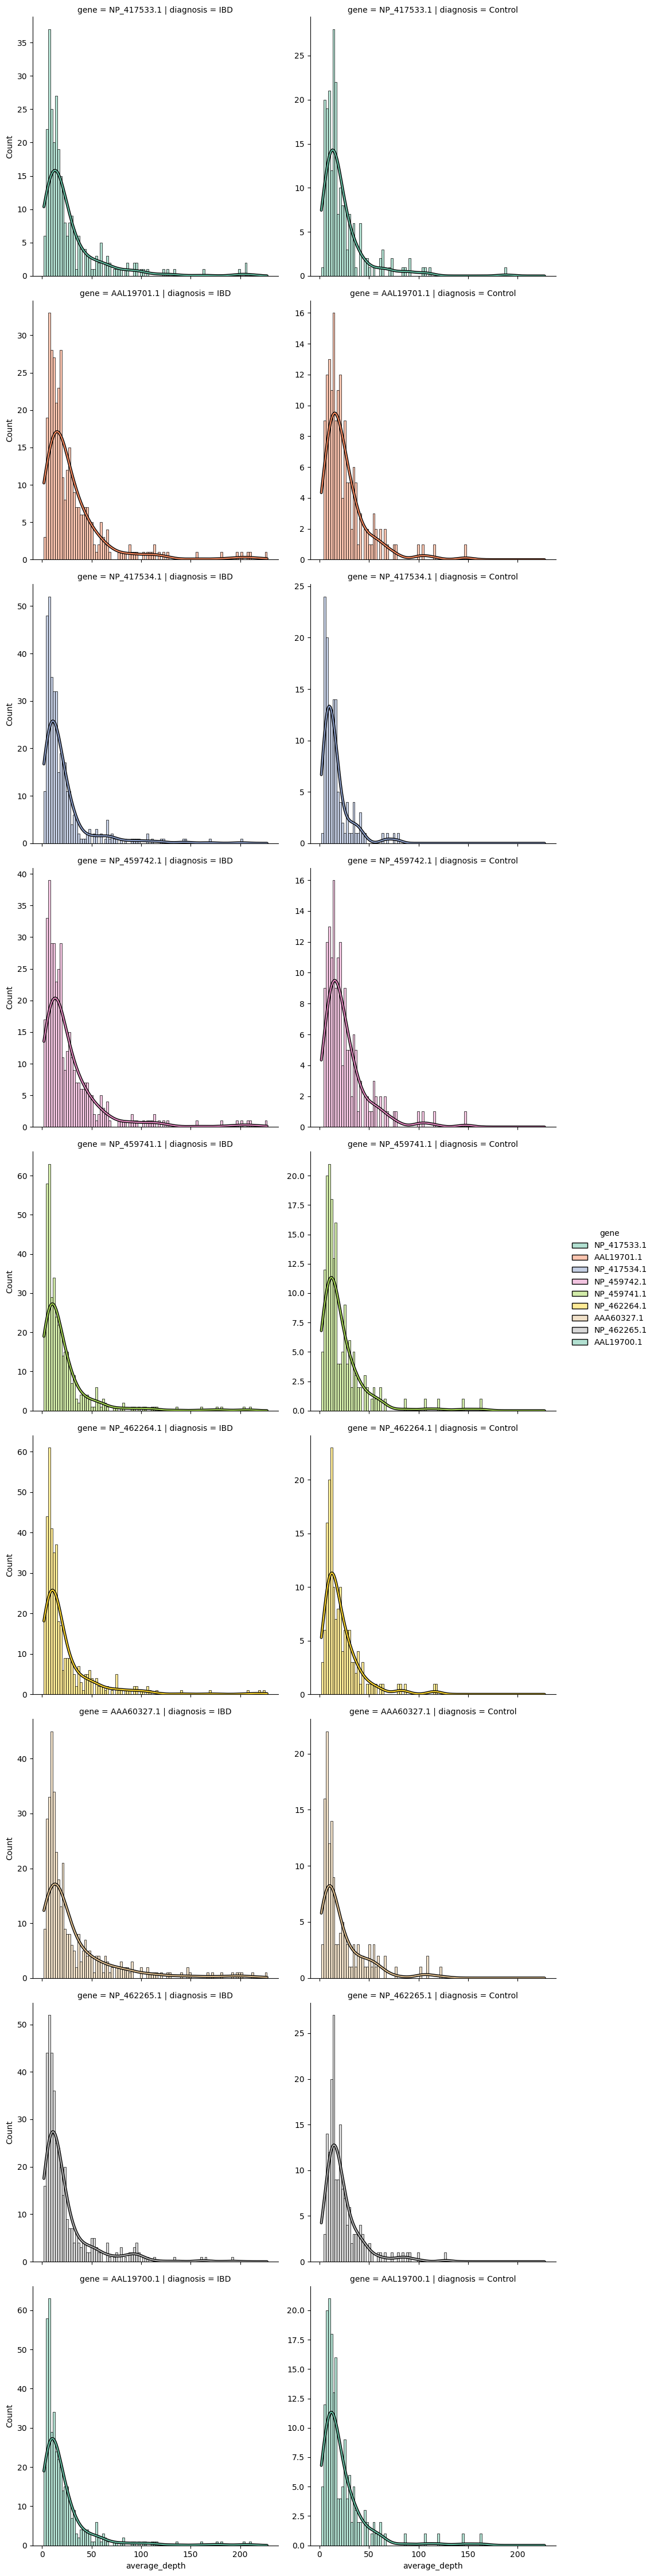

In [48]:
# For the genes found in any sample, there is a greater amount of the same coverage of target genes
# in IBD samples compared to control even after removing the 'extremely' deep coverage only seen in the IBD samples.
g = sns.displot(
    data=df_simple_filter_outlierless,
    x="average_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True,
    facet_kws={'sharey': False}
)

# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
for ax in g.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)
plt.show()

In [94]:
run_counts = df_simple.groupby(['diagnosis', 'gene'])['run'].nunique().reset_index(name='unique_run_count')

df_plot = df_simple_filter.merge(run_counts, on=['diagnosis', 'gene'], how='left')

#If a group has fewer unique runs, each sample gets a larger weight.
#If a group has more unique runs, each sample gets a smaller weight.
df_plot['weight'] = 1 / df_plot['unique_run_count']
df_plot

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,norm_depth,unique_run_count,weight
0,k119_38397_2,SRR5650060,NP_417533.1,IBD,8599308,900.0,81.0,5.0,76.0,900.0,8.34,0.969845,687,0.001456
1,k119_60203_75,SRR6468687,AAL19701.1,Control,48956407,846.0,414.0,36.0,378.0,846.0,45.05,0.920206,372,0.002688
2,k119_155032_2,SRR6468687,AAL19701.1,Control,48956407,843.0,104.0,24.0,80.0,843.0,10.41,0.212638,372,0.002688
3,k119_50313_4,SRR2145382,NP_417533.1,Control,6515322,900.0,146.0,42.0,104.0,900.0,13.82,2.121154,372,0.002688
4,k119_11576_4,SRR6468515,NP_417534.1,IBD,17568250,627.0,89.0,15.0,74.0,627.0,12.06,0.686466,687,0.001456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,k119_59950_2,SRR6468600,NP_459742.1,IBD,17022619,843.0,66.0,6.0,60.0,843.0,7.53,0.442353,687,0.001456
4804,k119_14848_15,SRR2145355,AAL19701.1,IBD,19351034,846.0,111.0,14.0,97.0,846.0,12.00,0.620122,687,0.001456
4805,k119_93518_36,SRR6468606,NP_462264.1,IBD,46499575,627.0,510.0,58.0,452.0,627.0,75.23,1.617864,687,0.001456
4806,k119_18384_2,SRR6468606,NP_462264.1,IBD,46499575,627.0,384.0,60.0,324.0,627.0,56.37,1.212269,687,0.001456


In [95]:
mean_depth = df_plot.groupby(['gene', 'diagnosis'])['norm_depth'].mean().reset_index(name='mean_norm_depth')
print(mean_depth)

df_plot.groupby(['gene', 'diagnosis'])['norm_depth'].count()

grouped = df_plot.groupby(['gene', 'diagnosis'])
grouped

           gene diagnosis  mean_norm_depth
0    AAA60327.1   Control         1.891522
1    AAA60327.1       IBD         2.480181
2    AAL19700.1   Control         0.961226
3    AAL19700.1       IBD         1.888064
4    AAL19701.1   Control         1.219849
5    AAL19701.1       IBD         2.143297
6   NP_417533.1   Control         1.775434
7   NP_417533.1       IBD         2.276065
8   NP_417534.1   Control         1.779692
9   NP_417534.1       IBD         3.140829
10  NP_459741.1   Control         0.961226
11  NP_459741.1       IBD         1.888064
12  NP_459742.1   Control         1.219849
13  NP_459742.1       IBD         2.096701
14  NP_462264.1   Control         1.387108
15  NP_462264.1       IBD         2.019667
16  NP_462265.1   Control         1.515752
17  NP_462265.1       IBD         2.262936


In [102]:
counts = grouped['norm_depth'].count()
print(counts)
weights = grouped['weight'].first()  # or .mean(), if all weights are equal per group
print(weights)
adjusted_counts = counts * weights
mean_count = adjusted_counts.reset_index(name='mean_count')
mean_count
print(mean_count)

means = mean_depth.merge(mean_count, on=['diagnosis', 'gene'], how='left')
means

gene         diagnosis
AAA60327.1   Control      130
             IBD          370
AAL19700.1   Control      169
             IBD          404
AAL19701.1   Control      156
             IBD          343
NP_417533.1  Control      207
             IBD          292
NP_417534.1  Control      132
             IBD          367
NP_459741.1  Control      169
             IBD          404
NP_459742.1  Control      156
             IBD          386
NP_462264.1  Control      153
             IBD          397
NP_462265.1  Control      167
             IBD          406
Name: norm_depth, dtype: int64
gene         diagnosis
AAA60327.1   Control      0.002688
             IBD          0.001456
AAL19700.1   Control      0.002688
             IBD          0.001456
AAL19701.1   Control      0.002688
             IBD          0.001456
NP_417533.1  Control      0.002688
             IBD          0.001456
NP_417534.1  Control      0.002688
             IBD          0.001456
NP_459741.1  Control      0.00268

,gene,diagnosis,mean_norm_depth,mean_count
0,AAA60327.1,Control,1.891522,0.349462
1,AAA60327.1,IBD,2.480181,0.538574
2,AAL19700.1,Control,0.961226,0.454301
3,AAL19700.1,IBD,1.888064,0.588064
4,AAL19701.1,Control,1.219849,0.419355
5,AAL19701.1,IBD,2.143297,0.499272
6,NP_417533.1,Control,1.775434,0.556452
7,NP_417533.1,IBD,2.276065,0.425036
8,NP_417534.1,Control,1.779692,0.354839
9,NP_417534.1,IBD,3.140829,0.534207


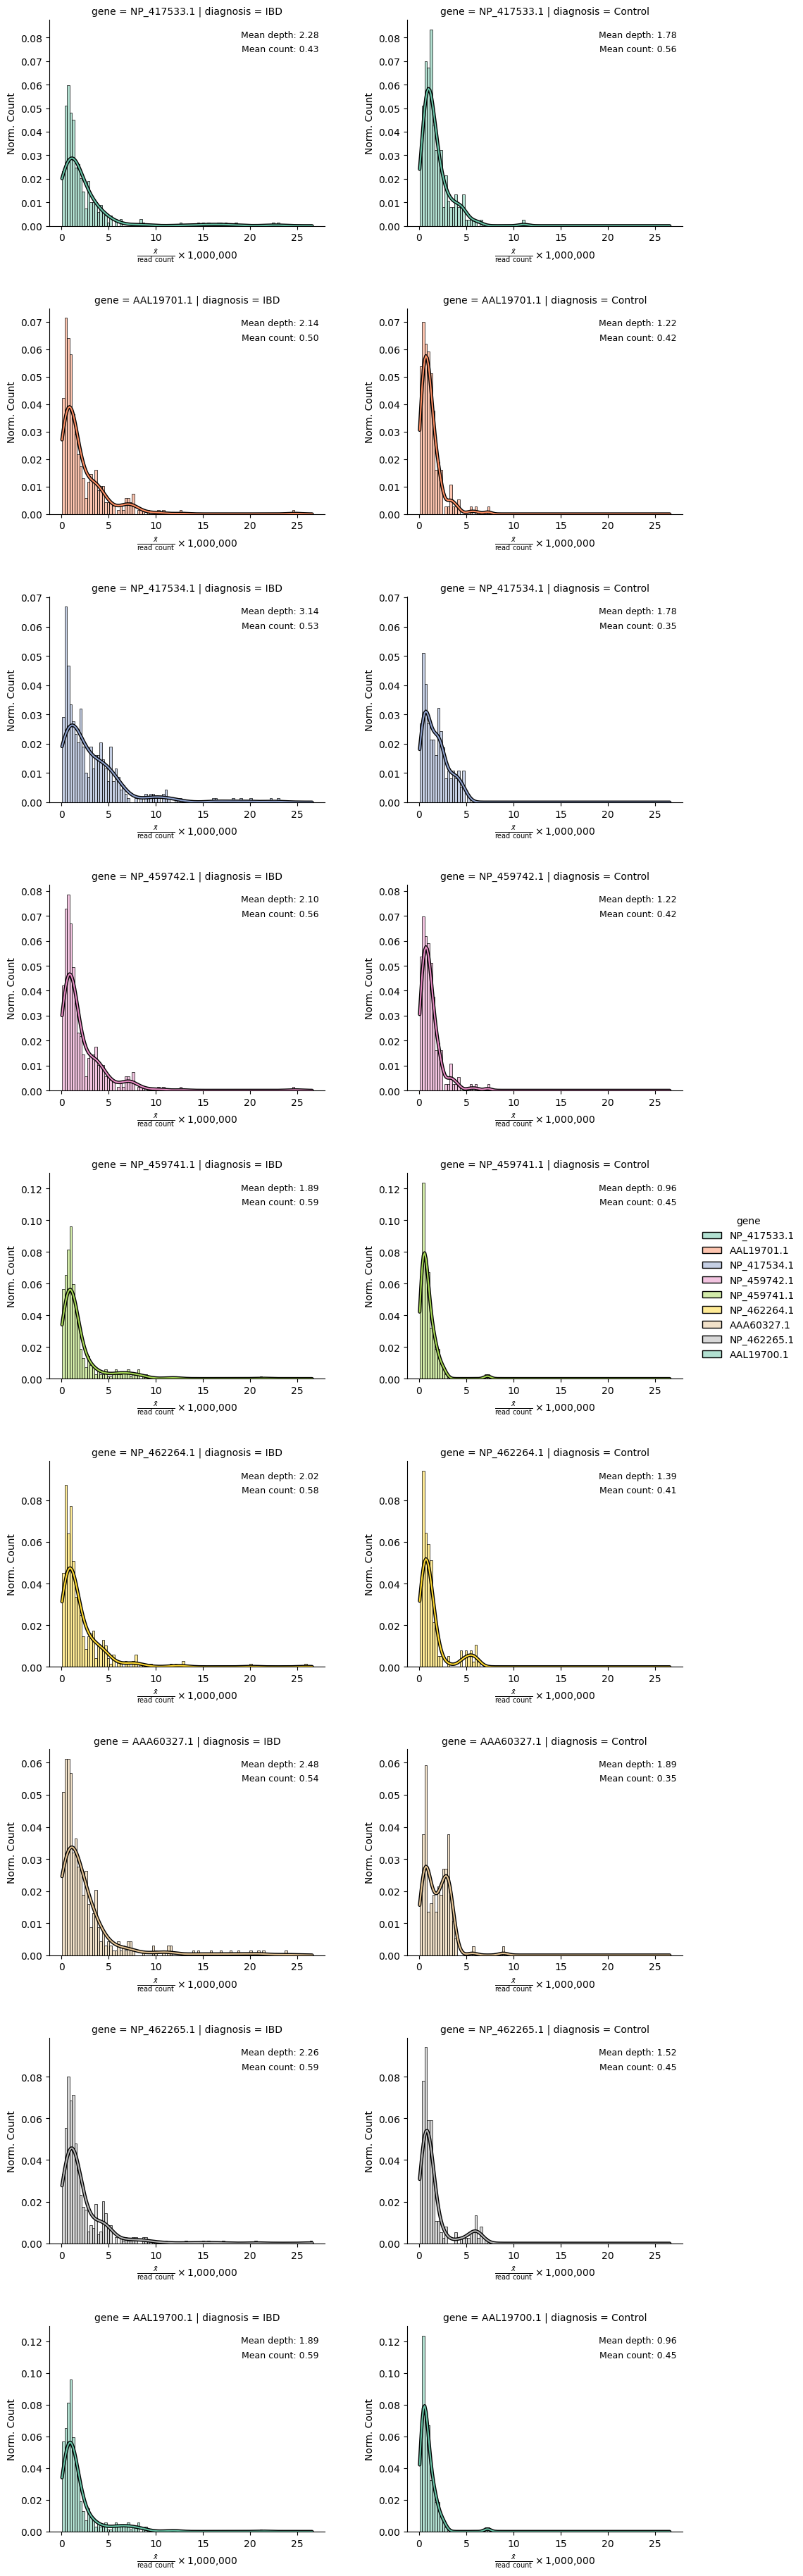

In [122]:
p = sns.displot(
    data=df_plot,
    x="norm_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True,
    weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        gene = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = means[(means['gene'] == gene) & (means['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_norm_depth'].values[0]
        mean_con = row['mean_count'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.88,
            f"Mean count: {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )

    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p.fig.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.20)  # add space for x axis

plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

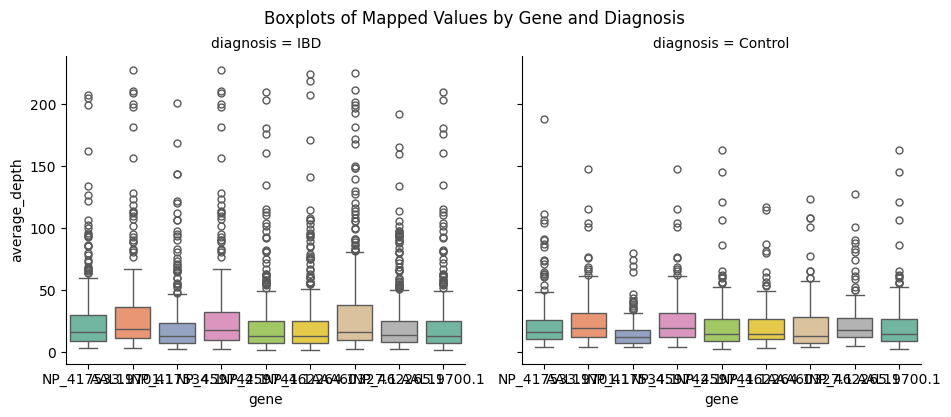

In [50]:
# While the distribution seems to show an increase in genes 
sns.catplot(
    data=df_simple_filter_outlierless,
    x="gene",
    y="average_depth",  # or "mapped"
    hue="gene", 
    kind="box",
    col="diagnosis",
    palette="Set2",
    height=4,
    aspect=1.2
)

plt.suptitle("Boxplots of Mapped Values by Gene and Diagnosis", y=1.03)
plt.show()

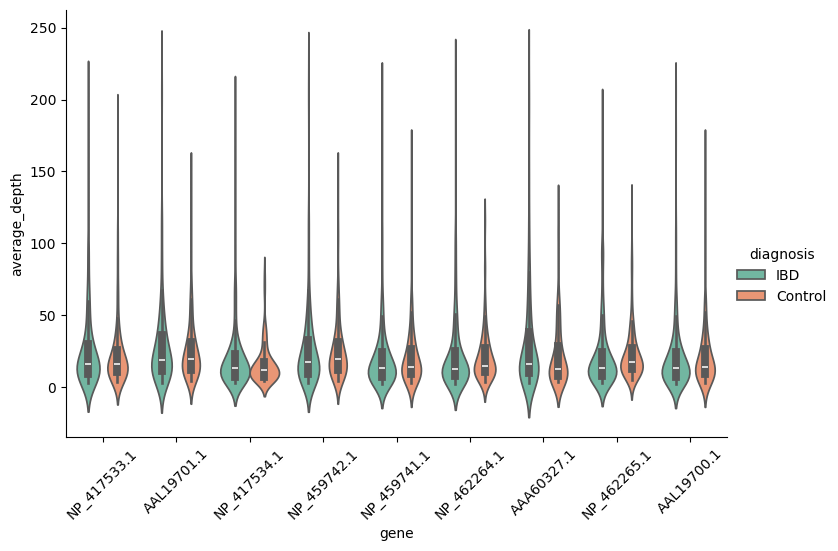

In [51]:
sns.catplot(
    data=df_simple_filter_outlierless,
    x="gene",
    y="average_depth",
    hue="diagnosis",
    kind="violin",
    palette="Set2",
    aspect=1.5
)
plt.xticks(rotation=45)

#plt.savefig('coverage_violin.png', dpi=300, bbox_inches='tight')
plt.show()

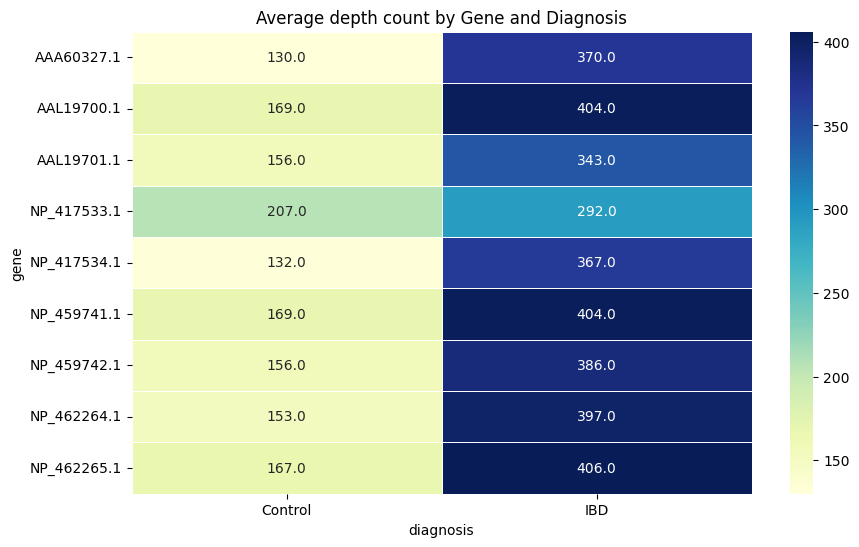

In [52]:
heatmap_data = df_simple_filter.pivot_table(
    index='gene',
    columns='diagnosis',
    values='average_depth',    # 'average_depth', or 'mapped'
    aggfunc='count'      # 'count', or 'mean'
)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Average depth count by Gene and Diagnosis')

#plt.savefig('coverage_mean.png', dpi=300, bbox_inches='tight')
plt.show()

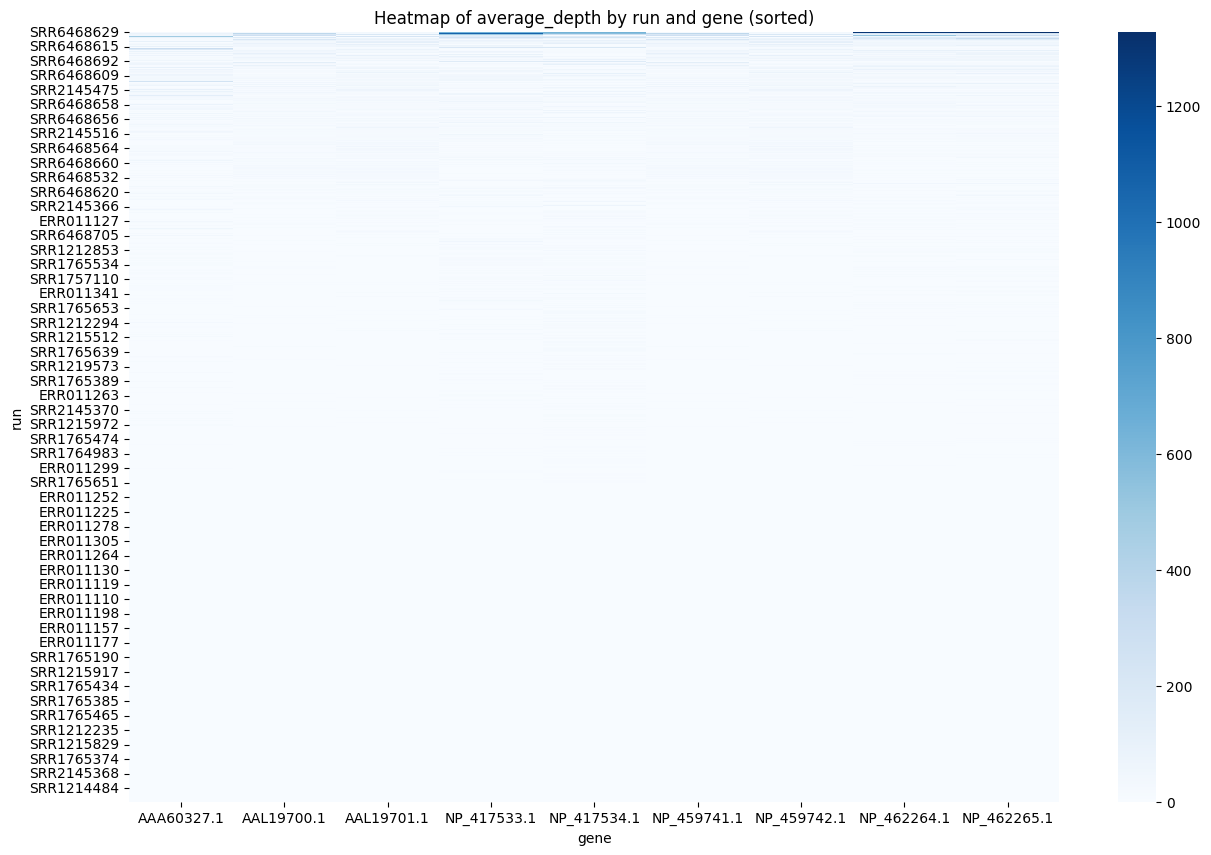

In [53]:
hd = df_simple.pivot_table(index="run", columns="gene", values="average_depth")

hd_filled = hd.fillna(hd.mean().mean())

# Sort by row means to get some order
hd_sorted = hd_filled.loc[hd_filled.mean(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(15,10))
sns.heatmap(hd_sorted, cmap='Blues')
plt.title("Heatmap of average_depth by run and gene (sorted)")
plt.show()

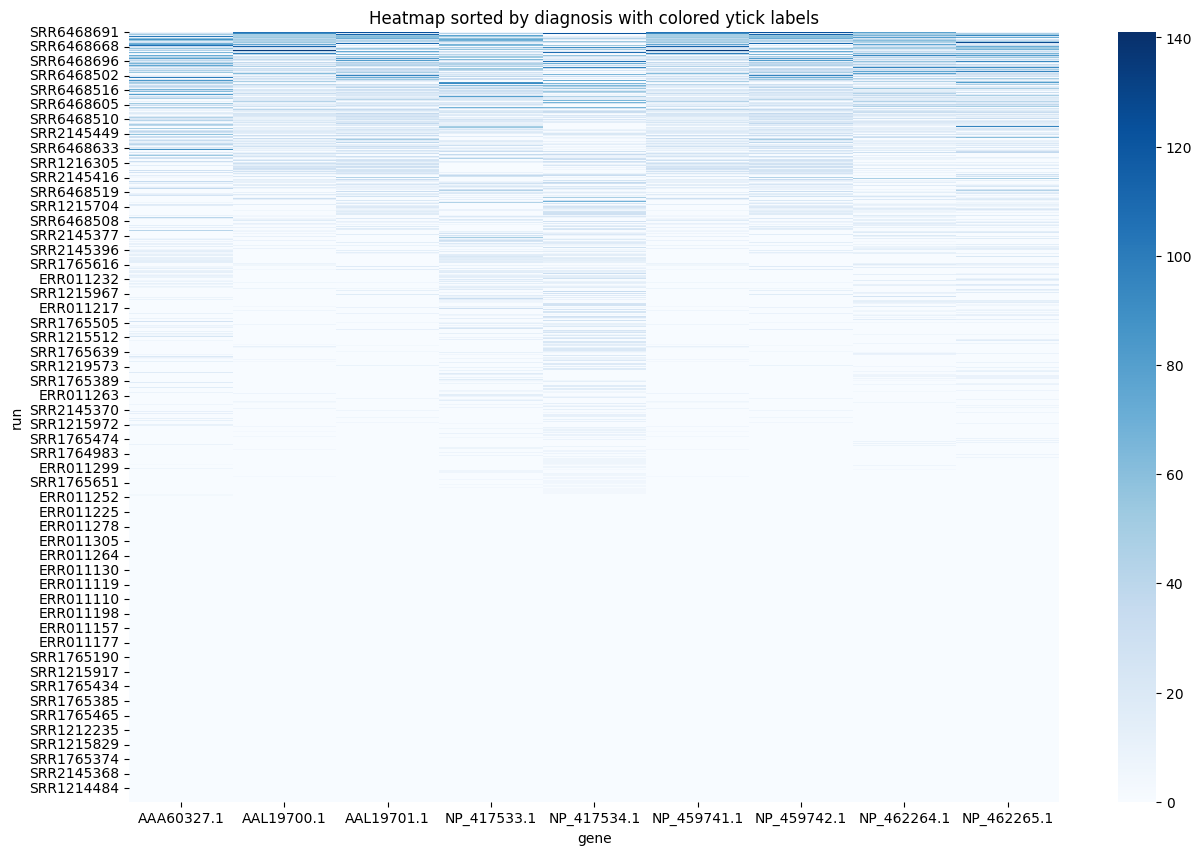

In [54]:
# Calculate mean and std deviation
mean_val = df_simple['average_depth'].mean()
std_val = df_simple['average_depth'].std()

# Define lower and upper bounds
lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

# Filter rows where average_depth is within ±3 SD
filtered_df = df_simple[(df_simple['average_depth'] >= lower_bound) & (df_simple['average_depth'] <= upper_bound)]

hd = filtered_df.pivot_table(index="run", columns="gene", values="average_depth")

hd_filled = hd.fillna(hd.mean().mean())

# Sort by row means to get some order
hd_sorted = hd_filled.loc[hd_filled.mean(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

plt.title("Heatmap sorted by diagnosis with colored ytick labels")
plt.show()

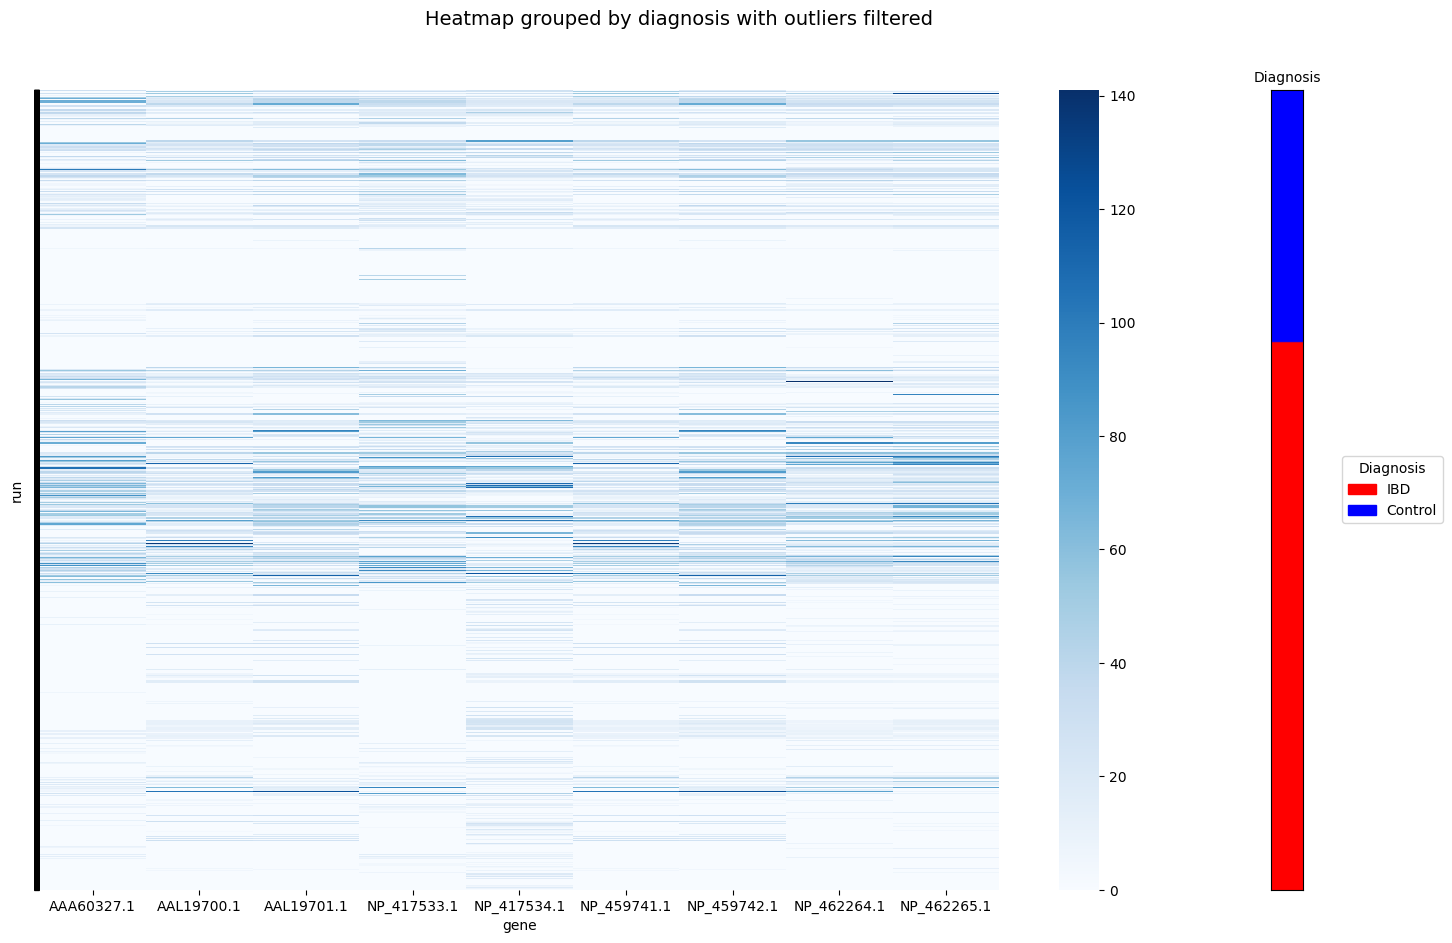

In [55]:

###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = filtered_df.pivot_table(index="run", columns="gene", values="average_depth") #filtered_df, df_simple?
hd_filled = hd.fillna(hd.mean().mean())
######

# Diagnosis lookup
run_to_diag = df_simple.set_index('run')['diagnosis']
diag_for_runs = run_to_diag.loc[hd_filled.index]

# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd_filled.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]

# Create a palette and color array
palette = {'IBD': 'red', 'Control': 'blue'}
diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

# === Plot heatmap + side diagnosis color bar ===
fig = plt.figure(figsize=(16, 10))

# Heatmap axis
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax1, cbar=True)
ax1.set_yticks(np.arange(len(hd_sorted)) + 0.5)
ax1.set_yticklabels([])

# Color bar axis for diagnosis strip
ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

# Add legend manually
handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with outliers filtered", fontsize=14)

plt.savefig('coverage_heatmap_filtered_outliers.png', dpi=300, bbox_inches='tight')

plt.show()

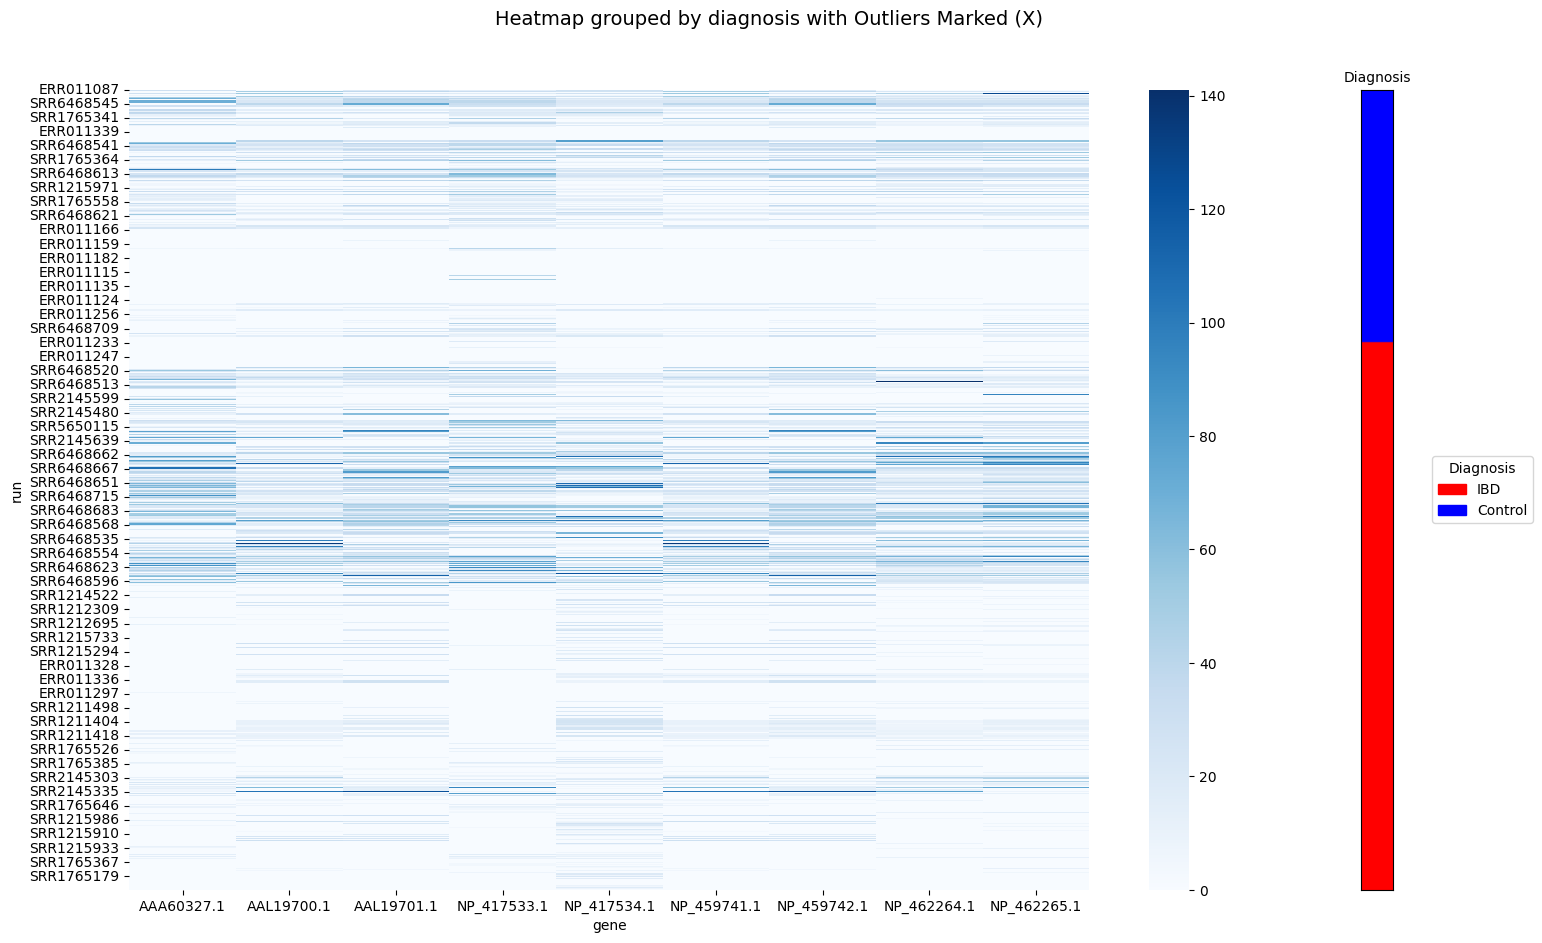

In [56]:
outlier_mask = (hd_sorted < lower_bound) | (hd_sorted > upper_bound)

diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

fig = plt.figure(figsize=(16, 10))

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

for y in range(hd_sorted.shape[0]):
    for x in range(hd_sorted.shape[1]):
        if outlier_mask.iloc[y, x]:
            ax.text(x + 0.5, y + 0.5, 'X', ha='center', va='center', color='red', fontsize=10)

ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with Outliers Marked (X)", fontsize=14)

#plt.savefig('coverage_heatmap_full_marked_outliers.png', dpi=300, bbox_inches='tight')
plt.show()